<a href="https://colab.research.google.com/github/kouroshkarimi/Keras-Introducing-to-Deep-Learning/blob/main/005-DCGAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets.cifar10 import load_data
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras

In [ ]:
(train_X, train_y), (test_X, test_y) = load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [ ]:
print(train_X.shape)
print(test_X.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


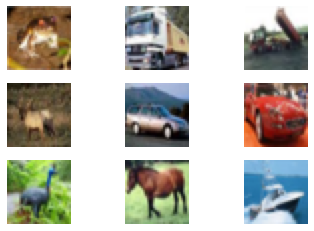

In [ ]:
for i in range(9):
  plt.subplot(3, 3, i + 1)
  plt.axis('off')
  plt.imshow(train_X[i])

plt.show()


# How to Define and Train the Discriminator Model

In [ ]:
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import LeakyReLU

def define_discriminator(in_shape=(32,32,3)):
  # define model
  model = Sequential()
  model.add(Conv2D(64, (3,3), padding='same', input_shape = in_shape))
  model.add(LeakyReLU(alpha=0.2))

  model.add(Conv2D(128, (3,3), strides=(2,2), padding='same'))
  model.add(LeakyReLU(alpha=0.2))

  model.add(Conv2D(128, (3,3), strides=(2,2), padding='same'))
  model.add(LeakyReLU(alpha=0.2))

  model.add(Conv2D(128, (3,3), strides=(2,2), padding='same'))
  model.add(LeakyReLU(alpha=0.2))

  model.add(Flatten())
  model.add(Dropout(0.4))
  model.add(LeakyReLU(alpha=0.2))
  
  model.add(Dense(1, activation='sigmoid'))

  # optimizer
  optimizer = Adam(learning_rate=0.0002, beta_1=0.5)


  # compile model
  model.compile(loss= 'binary_crossentropy', optimizer = optimizer, metrics='accuracy')

  return model

In [ ]:
model = define_discriminator()

In [ ]:
# summary model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 128)         147584    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 128)         1

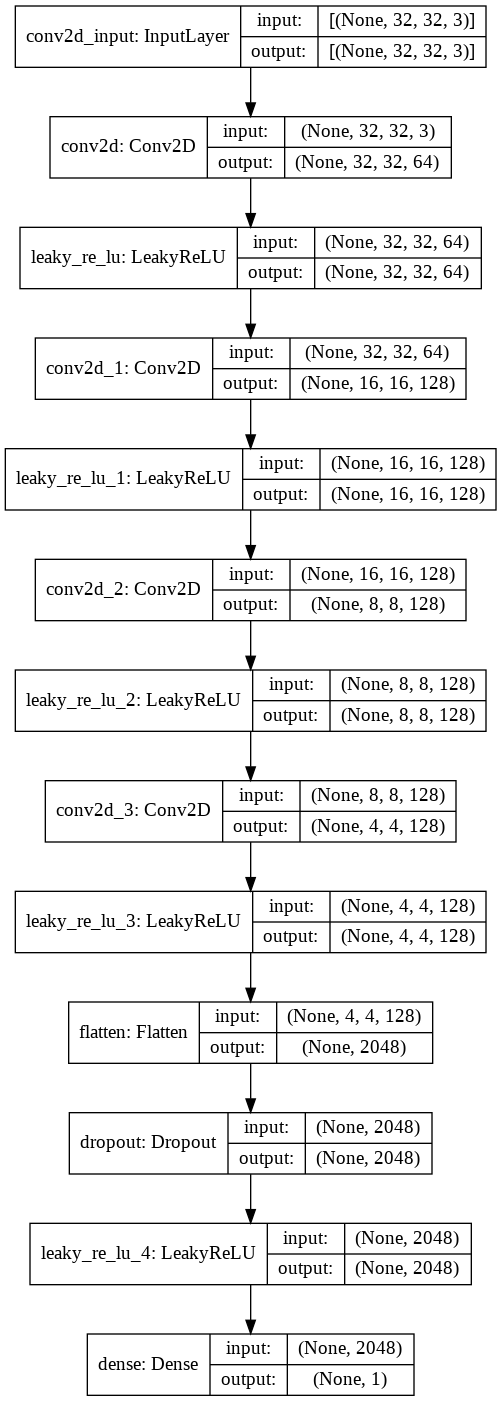

In [ ]:
from keras.utils.vis_utils import plot_model
# plot model
plot_model(model, show_shapes = True)

## Test Discriminator

In [ ]:
# normalize
x = train_X.astype('float32')
x = (x-127.5)/127.5

In [ ]:
def load_read_samples():
  (train_x,_),(_,_) = load_data()
  x = train_X.astype('float32')
  x = (x-127.5)/127.5

  return x

`generate_real_samples()`

1.   select a random subsample of images (x)
2.   set class labels for sample (y)
3.   return x, y



In [ ]:
def generate_real_samples(dataset, n_sample):
  i = np.random.randint(0, dataset.shape[0], n_sample)
  x = dataset[i]
  y = np.ones((n_sample,1))
  return x, y


We don’t have a generator model yet, so instead, we can generate images comprised of random pixel values, specifically random pixel values in the range [0,1], then scaled to the range [-1, 1] like our scaled real images.

In [ ]:
def generate_fake_samples(n_sample):
  x = np.random.rand(32 * 32 * 3,n_sample)
  x = x*2 - 1
  x = x.reshape(n_sample,32,32,3)
  y = np.zeros((n_sample, 1))
  return x, y

In [ ]:
def train_discriminator(model, dataset, n_iter=20, n_batch=128):
  half_batch = int(n_batch / 2)
  for i in range(n_iter):
    # load read sample and train model with them
    x_real, y_real = generate_real_samples(dataset, half_batch)
    _, real_acc = model.train_on_batch(x_real,y_real)


    # generate fake sample and train model with them

    x_fake, y_fake =generate_fake_samples(half_batch)
    _, fake_acc = model.train_on_batch(x_fake, y_fake)


    print(" itr : {} ----- real_acc : {} ------ fake_acc : {}".format(i+1, real_acc * 100, fake_acc * 100))

In [ ]:
# create and test discriminator model
model = define_discriminator()
dataset = load_read_samples()
train_discriminator(model, dataset, 20, 128)

 itr : 1 ----- real_acc : 23.4375 ------ fake_acc : 23.4375
 itr : 2 ----- real_acc : 75.0 ------ fake_acc : 45.3125
 itr : 3 ----- real_acc : 82.8125 ------ fake_acc : 73.4375
 itr : 4 ----- real_acc : 71.875 ------ fake_acc : 90.625
 itr : 5 ----- real_acc : 70.3125 ------ fake_acc : 100.0
 itr : 6 ----- real_acc : 76.5625 ------ fake_acc : 100.0
 itr : 7 ----- real_acc : 73.4375 ------ fake_acc : 100.0
 itr : 8 ----- real_acc : 70.3125 ------ fake_acc : 100.0
 itr : 9 ----- real_acc : 76.5625 ------ fake_acc : 100.0
 itr : 10 ----- real_acc : 76.5625 ------ fake_acc : 100.0
 itr : 11 ----- real_acc : 85.9375 ------ fake_acc : 100.0
 itr : 12 ----- real_acc : 95.3125 ------ fake_acc : 100.0
 itr : 13 ----- real_acc : 93.75 ------ fake_acc : 100.0
 itr : 14 ----- real_acc : 95.3125 ------ fake_acc : 100.0
 itr : 15 ----- real_acc : 98.4375 ------ fake_acc : 100.0
 itr : 16 ----- real_acc : 98.4375 ------ fake_acc : 100.0
 itr : 17 ----- real_acc : 95.3125 ------ fake_acc : 100.0
 itr 

# How to Define and Use the Generator Model

In [ ]:
from keras.layers import Conv2DTranspose
from keras.layers import Reshape
from keras.layers import ReLU

In [ ]:
def define_generator(latent_dim):
  model = Sequential()

  n_nodes = 256 * 4 * 4
  model.add(Dense(n_nodes, input_dim = latent_dim,activation='relu'))
  

  model.add(Reshape((4,4,256)))

  model.add(Conv2DTranspose(128,(4,4), strides=(2,2), padding='same', activation='relu'))

  model.add(Conv2DTranspose(128,(4,4), strides=(2,2), padding='same', activation='relu'))
  
  model.add(Conv2DTranspose(128,(4,4), strides=(2,2), padding='same', activation='relu'))

  model.add(Conv2D(3, (3,3), activation='relu', padding='same'))



  return model


In [ ]:

latent_dim = 100
model = define_generator(latent_dim)

In [ ]:
# summary model
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 4096)              413696    
_________________________________________________________________
reshape (Reshape)            (None, 4, 4, 256)         0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 8, 8, 128)         524416    
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 16, 16, 128)       262272    
_________________________________________________________________
conv2d_transpose_2 (Conv2DTr (None, 32, 32, 128)       262272    
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 32, 3)         3459      
Total params: 1,466,115
Trainable params: 1,466,115
Non-trainable params: 0
____________________________________________

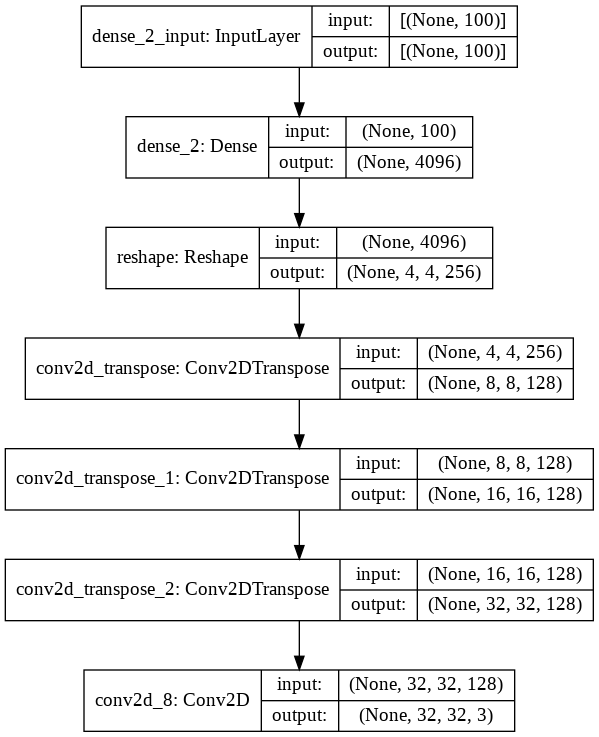

In [ ]:
# plot model
plot_model(model, show_shapes = True)

`generate_latent_points()`

generates the desired number of points in the latent space that can be used as input to the generator model

In [ ]:
def generate_latent_points(latent_dim, n_samples):
  
  x_input = np.random.rand(latent_dim * n_samples)
  x_input = x_input.reshape(n_samples, latent_dim)

  return x_input 
  

In [ ]:
def generate_fake_samples(g_model, latent_dim, n_samples):
  x_input = generate_latent_points(latent_dim, n_samples)
  x = g_model.predict(x_input)
  y = np.zeros((n_samples,1))

  return x, y


(49, 32, 32, 3)


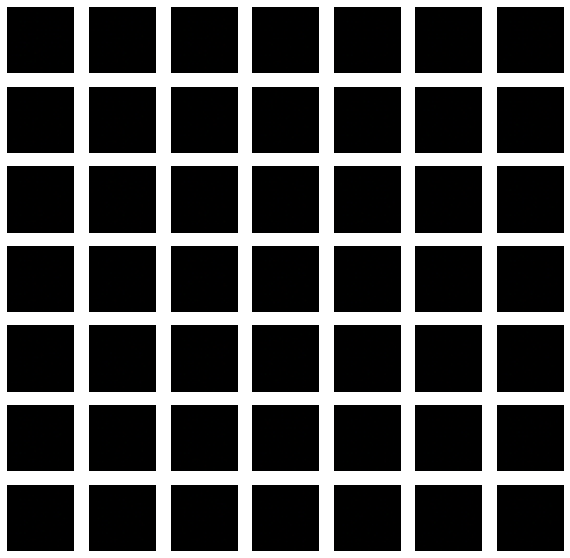

In [ ]:
# create and test generator model

latent_dim = 100
model = define_generator(latent_dim)
n_samples = 49

X, _ = generate_fake_samples(model, latent_dim, n_samples)


plt.figure(figsize=(10, 10))
for i in range(n_samples):
  plt.subplot(7, 7, i+1)
  plt.axis('off')
  plt.imshow(X[i])

plt.show()

# How to Train the Generator Model

In [ ]:
def define_gan(g_model, d_model):
  d_model.trainable = False
  model = Sequential()
  # add g_model and d_model to model
  model.add(g_model)
  model.add(d_model)
  # compile 
  opt = Adam(lr = 0.0002, beta_1=0.5)
  model.compile(loss = 'binary_crossentropy', optimizer= opt)
  
  
  return model

In [ ]:
# create gan_model 
latent_dim = 100

d_model = define_discriminator()
g_model = define_generator(latent_dim)

gan_model = define_gan(g_model, d_model)

In [ ]:
# summary gan_model
gan_model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_7 (Sequential)    (None, 32, 32, 3)         1466115   
_________________________________________________________________
sequential_6 (Sequential)    (None, 1)                 372865    
Total params: 1,838,980
Trainable params: 1,466,115
Non-trainable params: 372,865
_________________________________________________________________


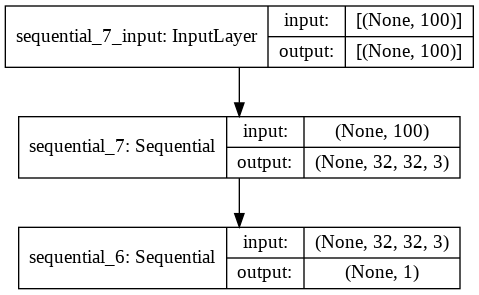

In [ ]:
# plot gan_model
plot_model(gan_model, show_shapes=True)

In [ ]:
def train_gan(gan_model, latent_dim, n_epochs=200, n_batch=128):
  for i in range(n_epochs):
    x_gan = generate_latent_points(latent_dim,n_batch)
    y_gan = np.ones((n_batch, 1))
    gan_model.train_on_batch(x_gan,y_gan)

In [ ]:
def train(g_model, d_model, gan_model, dataset, latent_dim, n_epochs=200, n_batch=128):
  batch_per_epoch = int(dataset.shape[0]/n_batch)
  half_batch = int(n_batch/2)
  for i in range(n_epochs):
    for j in range(batch_per_epoch):
      x_real,y_real = generate_real_samples(dataset, half_batch)
      d_loss_real, _ = d_model.train_on_batch(x_real, y_real)

      x_fake, y_fake = generate_fake_samples(g_model,latent_dim,half_batch)
      d_loss_fake = d_model.train(x_fake,y_fake)

      x_gan = generate_latent_points(latent_dim, n_batch)
      y_gan = np.ones((n_batch,1))
      g_loss = gan_model.train_on_batch(x_gan, y_gan)
      
      print("{} -- {}/{} -- {} -- {} -- {}".format(i+1, j+1, batch_per_epoch, d_loss1, d_loss2, g_loss))

  # complete train function
  


# How to Evaluate GAN Model Performance

In [ ]:
def save_plot(examples, epoch, n=7):
  plt.figure(figsize=(20, 20))
  examples = (examples + 1) / 2.0
  for i in range(n*n):
    plt.subplot(n, n, 1+i)
    plt.axis('off')
    plt.imshow(examples[i])

  filename = 'generated_plot_e%03d.png' % (epoch+1)
  plt.savefig(filename)
  plt.close()

In [ ]:
def summarize_performance(epoch, g_model, d_model, dataset, latent_dim, n_samples=150):

  X_real, y_real = generate_real_samples(dataset, n_samples)
  _, acc_real = d_model.evaluate(X_real, y_real, verbose=0)

  X_fake, y_fake = generate_fake_samples(g_model, latent_dim, n_samples)
  _, acc_fake = d_model.evaluate(X_fake, y_fake, verbose=0)
  
  print('>Accuracy real: %.0f%%, fake: %.0f%%' % (acc_real*100, acc_fake*100))

  save_plot(X_fake, epoch)
  filename = 'generator_model_%03d.h5' % (epoch+1)
  g_model.save(filename)

In [ ]:
# overwrite

def train(g_model, d_model, gan_model, dataset, latent_dim, n_epochs=50, n_batch=128):
  
  batch_per_epoch = int(dataset.shape[0]/n_batch)
  half_batch = int(n_batch/2)
  for i in range(n_epochs):
    for j in range(batch_per_epoch):
      x_real,y_real = generate_real_samples(dataset, half_batch)
      d_loss_real, _ = d_model.train_on_batch(x_real, y_real)

      x_fake, y_fake = generate_fake_samples(g_model,latent_dim,half_batch)
      d_loss_fake = d_model.train_on_batch(x_fake,y_fake)

      x_gan = generate_latent_points(latent_dim, n_batch)
      y_gan = np.ones((n_batch,1))
      g_loss = gan_model.train_on_batch(x_gan, y_gan)
      
      print("{} -- {}/{} -- {} -- {} -- {}".format(i+1, j+1, batch_per_epoch, d_loss_real, d_loss_fake, g_loss))

      if ((i+1) %10 == 0) and ( j == batch_per_epoch - 2):
        summarize_performance(i, g_model, d_model, dataset, latent_dim)

  # complete train function
  
 


In [ ]:
# create models 
latent_dim = 100

d_model = define_discriminator()

g_model = define_generator(latent_dim)

gan_model = define_gan(g_model, d_model)

dataset = load_read_samples()

In [ ]:
# train
train(g_model, d_model, gan_model, dataset, latent_dim)

1 -- 1/390 -- 0.6927748918533325 -- [0.6951917409896851, 0.0] -- 0.6921977996826172
1 -- 2/390 -- 0.626640796661377 -- [0.6956378221511841, 0.0] -- 0.6915526390075684
1 -- 3/390 -- 0.5499873161315918 -- [0.6979525685310364, 0.0] -- 0.6897324919700623
1 -- 4/390 -- 0.46369558572769165 -- [0.7031232118606567, 0.0] -- 0.6857184171676636
1 -- 5/390 -- 0.36303097009658813 -- [0.7151070833206177, 0.0] -- 0.6758034229278564
1 -- 6/390 -- 0.2401013970375061 -- [0.741736888885498, 0.0] -- 0.6580110192298889
1 -- 7/390 -- 0.16571322083473206 -- [0.7899869680404663, 0.0] -- 0.6372990608215332
1 -- 8/390 -- 0.10664394497871399 -- [0.8127685785293579, 0.0] -- 0.6532275080680847
1 -- 9/390 -- 0.09242606163024902 -- [0.7534215450286865, 0.0] -- 0.7111574411392212
1 -- 10/390 -- 0.0639110580086708 -- [0.6622823476791382, 1.0] -- 0.7758119106292725
1 -- 11/390 -- 0.07769559323787689 -- [0.6271019577980042, 1.0] -- 0.8094671964645386
1 -- 12/390 -- 0.04988320916891098 -- [0.6200090050697327, 1.0] -- 0.8

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

>Accuracy real: 100%, fake: 100%


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

10 -- 390/390 -- 0.0032443522941321135 -- [0.003449961543083191, 1.0] -- 6.273031234741211
11 -- 1/390 -- 0.0 -- [0.0015793119091540575, 1.0] -- 6.802495002746582
11 -- 2/390 -- 9.094005062881827e-12 -- [0.0011539236875250936, 1.0] -- 6.918408393859863
11 -- 3/390 -- 0.0 -- [0.0011778587941080332, 1.0] -- 7.171652793884277
11 -- 4/390 -- 0.0 -- [0.0009776634396985173, 1.0] -- 7.177631378173828
11 -- 5/390 -- 0.0 -- [0.0009314176859334111, 1.0] -- 7.24979829788208
11 -- 6/390 -- 2.0435343142137158e-26 -- [0.0007818387821316719, 1.0] -- 7.255190849304199
11 -- 7/390 -- 0.0 -- [0.0008426106069236994, 1.0] -- 7.306066513061523
11 -- 8/390 -- 0.0 -- [0.0007909522391855717, 1.0] -- 7.271483421325684
11 -- 9/390 -- 0.0 -- [0.0007777555729262531, 1.0] -- 7.334897041320801
11 -- 10/390 -- 0.0 -- [0.0007642852142453194, 1.0] -- 7.417142868041992
11 -- 11/390 -- 3.474240614256859e-22 -- [0.0006615936290472746, 1.0] -- 7.299073219299316
11 -- 12/390 -- 0.0763188973069191 -- [0.0010487702675163746,